<h1 style="text-align: center">
<strong>UNALM: PRÁCTICA CALIFICADA 3 - API Spoonacular</strong>
</h1>

**INTEGRANTES:**
1. Pichardo Diestra, Oliverio
2. Ortiz Arone, Víctor Alejandro
3. Llamoca León, Israel
4. Quispe Cueva, Jorge Antonio

**GRUPO:** 7

# 1. DESCRIPCIÓN DE LA API
API de Spoonacular es un servicio web que ofrece una variedad de funciones relacionadas con la cocina y los alimentos. Algunas de las funciones que se ofrecen a través de la API incluyen la búsqueda de recetas, la búsqueda de ingredientes, la generación de menús y la generación de listas de compras. Los desarrolladores pueden utilizar la API para integrar estas funciones en sus propias aplicaciones y sitios web.

# 2. LIBRERÍAS, MÓDULOS Y PAQUETES
A fin de realizar la extracción de datos pertinentes, se emplearán las siguientes librerías, módulos o paquetes:

In [1]:
# %pip install matplotlib.pyplot
import requests # hacer peticiones HTTP a servidores web
import pandas as pd 
import matplotlib.pyplot as plt

# 2. EXTRACCIÓN Y VISUALIZACIÓN DE LA INFORMACIÓN
A continuación se procederá a extraer la información de la recetas similares a la receta de *Spiced Apples*.

In [2]:
# Clave de API de Spoonacular
api_key = "1a60313c31a84c6d80a50e336bd18421"
# ID de la receta de la que se desea encontrar recetas similares
recipe_id = 47746
# Realizar una llamada a la API para obtener recetas similares
url = f"https://api.spoonacular.com/recipes/{recipe_id}/similar"
query_params = {"apiKey": api_key}
response = requests.get(url, params=query_params).json()
response

[{'id': 456541,
  'imageType': 'jpg',
  'title': 'Spiced Apples',
  'readyInMinutes': 45,
  'servings': 8,
  'sourceUrl': 'http://allrecipes.com/Recipe/Spiced-Apples/'},
 {'id': 403407,
  'imageType': 'jpg',
  'title': 'Glazed Spiced Apples',
  'readyInMinutes': 25,
  'servings': 10,
  'sourceUrl': 'http://www.tasteofhome.com/recipes/glazed-spiced-apples'},
 {'id': 48263,
  'imageType': 'jpg',
  'title': 'Chicken & Spiced Apples',
  'readyInMinutes': 35,
  'servings': 6,
  'sourceUrl': 'http://www.eatingwell.com/recipes/chicken_spiced_apples.html'},
 {'id': 313917,
  'imageType': 'jpeg',
  'title': 'Spiced Apples and Raisins',
  'readyInMinutes': 38,
  'servings': 4,
  'sourceUrl': 'http://www.foodnetwork.com/recipes/tyler-florence/spiced-apples-and-raisins-recipe.html'},
 {'id': 403413,
  'imageType': 'jpg',
  'title': 'Spiced Baked Apples',
  'readyInMinutes': 45,
  'servings': 2,
  'sourceUrl': 'http://www.tasteofhome.com/Recipes/spiced-baked-apples'},
 {'id': 586610,
  'imageType':

Ahora, se procede a colocar todo en un dataframe.

In [4]:
df = pd.DataFrame(response)
df

,id,imageType,title,readyInMinutes,servings,sourceUrl
0,456541,jpg,Spiced Apples,45,8,http://allrecipes.com/Recipe/Spiced-Apples/
1,403407,jpg,Glazed Spiced Apples,25,10,http://www.tasteofhome.com/recipes/glazed-spic...
2,48263,jpg,Chicken & Spiced Apples,35,6,http://www.eatingwell.com/recipes/chicken_spic...
3,313917,jpeg,Spiced Apples and Raisins,38,4,http://www.foodnetwork.com/recipes/tyler-flore...
4,403413,jpg,Spiced Baked Apples,45,2,http://www.tasteofhome.com/Recipes/spiced-bake...
5,586610,jpg,Vanilla Spiced Apples,35,8,http://www.nutmegnanny.com/2011/05/02/vanilla-...
6,930836,jpeg,Spiced Chicken with Apples,40,4,http://www.foodnetwork.com/recipes/food-networ...
7,151791,jpg,Spiced Waffles with Caramelized Apples,45,4,http://www.epicurious.com/recipes/food/views/S...


Transformemos las variables *readyInMinutes* en proporciones.

In [5]:
df["readyInMinutes_perc"] = (df["readyInMinutes"] / df["readyInMinutes"].sum()) * 100
df

,id,imageType,title,readyInMinutes,servings,sourceUrl,readyInMinutes_perc
0,456541,jpg,Spiced Apples,45,8,http://allrecipes.com/Recipe/Spiced-Apples/,14.610390
1,403407,jpg,Glazed Spiced Apples,25,10,http://www.tasteofhome.com/recipes/glazed-spic...,8.116883
2,48263,jpg,Chicken & Spiced Apples,35,6,http://www.eatingwell.com/recipes/chicken_spic...,11.363636
3,313917,jpeg,Spiced Apples and Raisins,38,4,http://www.foodnetwork.com/recipes/tyler-flore...,12.337662
4,403413,jpg,Spiced Baked Apples,45,2,http://www.tasteofhome.com/Recipes/spiced-bake...,14.610390
5,586610,jpg,Vanilla Spiced Apples,35,8,http://www.nutmegnanny.com/2011/05/02/vanilla-...,11.363636
6,930836,jpeg,Spiced Chicken with Apples,40,4,http://www.foodnetwork.com/recipes/food-networ...,12.987013
7,151791,jpg,Spiced Waffles with Caramelized Apples,45,4,http://www.epicurious.com/recipes/food/views/S...,14.610390


Visualicemos lo anterior mediante un gráfico circular.

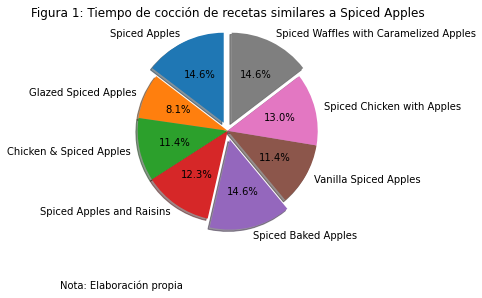

In [12]:
tiempo_coccion_plt = list(df["title"])
# Declarar el tamaño de cada 'rebanada' y en sumatoria todos deben dar al 100%
sizes = list(df["readyInMinutes_perc"])
# En este punto señalamos qué posición debe 'resaltarse' y el valor, si se coloca 0, se omite
explode = (0.1, 0, 0, 0, 0.1, 0, 0, 0.1)  
# Generar el marco de subploteos
fig1, ax1 = plt.subplots()
# Crear el gráfico, añadiendo los valores
ax1.pie(sizes, explode=explode, labels=tiempo_coccion_plt, autopct='%1.1f%%', shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title("Figura 1: Tiempo de cocción de recetas similares a Spiced Apples")
plt.annotate('Nota: Elaboración propia', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
# plt.legend()
plt.show()

Ahora, visualicemos que receta similar a Spiced Apples brinda una mayor cantidad de porciones.

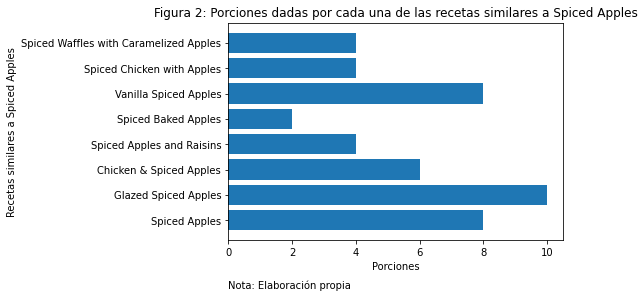

In [14]:
plt.barh(list(df["title"]), list(df["servings"]))
plt.xlabel('Porciones')
plt.ylabel('Recetas similares a Spiced Apples')
plt.title('Figura 2: Porciones dadas por cada una de las recetas similares a Spiced Apples')
plt.annotate('Nota: Elaboración propia', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

Debido a que no se cuenta con mayor información de cada una de las recetas similares a XXX, se procederá a acceder a la información de cada una de dichas recetas mediante otras peticiones.

In [ ]:
id=df["id"]
id

In [ ]:

df_list = []

for ids in id:
    url = f"https://api.spoonacular.com/recipes/{ids}/nutritionWidget.json"
    query_params = {"apiKey": api_key}
    response = requests.get(url, params=query_params).json()
    df = pd.DataFrame(response["bad"])
    # agrega una columna "id" al DataFrame con el valor del identificador actual
    df["id"] = ids
    df_list.append(df)

result_df = pd.concat(df_list)
# resetea los índices en el DataFrame resultante
result_df.reset_index(drop=True, inplace=True)

In [ ]:
result_df
